In [984]:
import numpy as np
import matplotlib.pyplot as plt
import math
from hmmlearn import hmm


%matplotlib notebook

### Распределения и HMM в Python

Задаём распределения для матрицы переходово, матрицы наблюдений и начальное распределение.

In [950]:
M = 2
K = 6
L = 20

In [951]:
states = np.array([[0.95, 0.05],
                   [0.1,  0.9]])

In [952]:
emis = np.array([[0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.1],
                 [0.16, 0.5]
                            ])

In [953]:
start = np.array([0.5, 0.5])

In [954]:
emis = emis.T

In [955]:
emis

array([[0.16, 0.16, 0.16, 0.16, 0.16, 0.16],
       [0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.5 ]])

Так же в Python есть модуль для формирования HMM по начальным матрицам, я воспользовался им, чтобы сравнивать своё апостериорное распределение и прогноз алгоритма Витерби. И с помощью него я формировал начальные вектор переходов и вектор наблюдений $X[1]$ и $X[0]$ соответсвенно.

In [956]:
model = hmm.MultinomialHMM(n_components=M)

In [957]:
model.startprob_ = start

In [958]:
model.transmat_ = states

In [959]:
model.emissionprob_ = emis

In [960]:
X=model.sample(L)

In [961]:
X[0]

array([[0],
       [5],
       [4],
       [2],
       [0],
       [0],
       [0],
       [4],
       [5],
       [1],
       [4],
       [4],
       [4],
       [3],
       [1],
       [1],
       [2],
       [5],
       [5],
       [5]], dtype=int64)

### Алгоритм Витерби

для j = 0: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][1]\cdot states[1,0], MK[i-1][0]\cdot states[0, 0])$$
для j = 1: $$MK[i, j] = emis[j, X[0][i]]\cdot max(MK[i-1][0]\cdot states[0,1], MK[i-1][1]\cdot states[1, 1])$$
$X[0]$ - сгенерированный вектор наблюдений

$MK$ - матрица вероятностей для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [962]:
MK = np.zeros((L, M))
#MK1 = np.zeros((L, M))

In [963]:
for j in range(M):
    MK[0, j] = emis[j, X[0][0]]*start[j]
    #MK1[0, j] = math.log2(emis[j, X[0][0]])+math.log2(start[j])

In [964]:
for i in range(1, L):
    for j in range(M):
        if j == 0:
            MK[i, j] = emis[j, X[0][i]]*max(MK[i-1][1]*states[1,0], MK[i-1][0]*states[0, 0])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][1]+math.log2(states[1,0]), 
            #                                                      MK1[i-1][0]+math.log2(states[0, 0])))
        if j == 1:
            MK[i, j] =emis[j, X[0][i]]*max(MK[i-1][0]*states[0,1], MK[i-1][1]*states[1,1])
            #MK1[i, j] = math.log2(emis[j, X[0][i]])+(max(MK1[i-1][0]+math.log2(states[0,1]), 
            #                                                      MK1[i-1][1]+math.log2(states[1, 1])))

In [965]:
MK

array([[8.00000000e-02, 5.00000000e-02],
       [1.21600000e-02, 2.25000000e-02],
       [1.84832000e-03, 2.02500000e-03],
       [2.80944640e-04, 1.82250000e-04],
       [4.27035853e-05, 1.64025000e-05],
       [6.49094496e-06, 1.47622500e-06],
       [9.86623634e-07, 1.32860250e-07],
       [1.49966792e-07, 1.19574225e-08],
       [2.27949524e-08, 5.38084013e-09],
       [3.46483277e-09, 4.84275611e-10],
       [5.26654581e-10, 4.35848050e-11],
       [8.00514964e-11, 3.92263245e-12],
       [1.21678274e-11, 4.00257482e-13],
       [1.84950977e-12, 6.08391372e-14],
       [2.81125485e-13, 9.24754886e-15],
       [4.27310738e-14, 1.40562743e-15],
       [6.49512321e-15, 2.13655369e-16],
       [9.87258728e-16, 1.62378080e-16],
       [1.50063327e-16, 7.30701361e-17],
       [2.28096257e-17, 3.28815613e-17]])

Можно сравнить то, что мы получили из Витерби с сгенерированным и с предсказанием питоновского модуля

In [966]:
X[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [967]:
myvit = np.argmax(MK, axis = 1)
myvit

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [968]:
model.decode(X[0])[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

### Алгоритм прямого хода

для j = 0: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][1]\cdot states[1,j]\cdot emis[j, X[0][i-1]]$$
для j = 1: $$PU[i, j] = PU[i-1][j]\cdot states[j,j]\cdot emis[j, X[0][i-1]]+PU[i-1][0]\cdot states[0,j]\cdot emis[j, X[0][i-1]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU$ - матрица вероятностей алгоритма прямого хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов


In [969]:
PU = np.zeros((L+1, M))
#PU1 = np.zeros((L+1, M))
PU[0] = start
#PU1[0][0] = math.log2(start[0])
#PU1[0][1] = math.log2(start[1])

In [970]:
for j in range(M):
    PU[1, j] = emis[j, X[1][0]]*start[j]
    #PU1[1, j] = math.log2(emis[j, X[1][0]]) + math.log2(start[j])

In [971]:
for i in range(2, L+1):
    for j in range(M):
            if j == 0:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][1]*states[1,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[1,j]) + math.log2(emis[j, X[0][i-1]])
            if j == 1:
                PU[i, j] = PU[i-1][j]*states[j,j]*emis[j, X[0][i-1]]+PU[i-1][0]*states[0,j]*emis[j, X[0][i-1]]
                #PU1[i, j] = PU1[i-1][j]+math.log2(states[j,j]) + math.log2(emis[j, X[0][i-1]]) 
                #+ PU1[i-1][1] + math.log2(states[0,j]) + math.log2(emis[j, X[0][i-1]])

### Алгоритм обратного хода

для j = 0: $$PU_b[i, j] = PU_b[i+1][j]\cdot states[j,j]\cdot emis[j, X[0][i]] + PU_b[i+1][1]\cdot states[j, 1]\cdot emis[j, X[0][i]]$$
для j = 1: $$PU_b[i, j] = PU_b[i+1][j]\cdot states[j,j]\cdot emis[j, X[0][i]] + PU_b[i+1][0]\cdot states[j, 0]\cdot emis[j, X[0][i]]$$
$X[0]$ - сгенерированный вектор наблюдений

$PU_b$ - матрица вероятностей алгоритма обратного хода для $j$-той кости(0 - честная, 1 - нечестная), $i$-того наблюдения (0:5)

$emis$ - матрица наблюдений 

$states$ - матрица переходов

In [972]:
PU_b = np.zeros((L+1, M))
#PU_b1 = np.zeros((L+1, M))

In [973]:
for j in range(M):
    PU_b[L, j] = 1
   # PU_b1[L, j] = math.log2(1)

In [974]:
for i in range(L-1,-1,-1):
    for j in range(M):
            if j == 0:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][1]*states[j, 1]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # + PU_b1[i+1][1] + math.log2(states[j, 1]) + math.log2(emis[j, X[0][i]])
            if j == 1:
                PU_b[i, j] = PU_b[i+1][j]*states[j,j]*emis[j, X[0][i]] + PU_b[i+1][0]*states[j, 0]*emis[j, X[0][i]]
               # PU_b1[i, j] = PU_b1[i+1][j] + math.log2(states[j,j]) + math.log2(emis[j, X[0][i]])
               # +PU_b1[i+1][1] + math.log2(states[j, 0]) + math.log2(emis[j, X[0][i]])

Вероятность существования цепочки по алгоритму прямого хода

In [975]:
sum(PU[-1])

2.416240380842557e-16

Вероятность существования цепочки по алгоритму обратного хода

In [976]:
sum(PU_b[0]*start)

2.4162403808425586e-16

Всё верно, так как эти вероятности должны быть равны

### Апостериорное распределение

Матрица апостериорного распределения $Pd$

In [977]:
Pd = np.zeros((L, M))

In [978]:
for i in range(L):
    for j in range(M):
        Pd[i, j] = (PU[i,j]*PU_b[i,j])/sum(PU[-1])

In [979]:
Pd

array([[0.64224935, 0.35775065],
       [0.64635808, 0.35261474],
       [0.6821812 , 0.24066747],
       [0.80909379, 0.1613471 ],
       [0.87965027, 0.11724931],
       [0.91545337, 0.09487236],
       [0.92746517, 0.08736499],
       [0.9193634 , 0.0924286 ],
       [0.88866749, 0.11161354],
       [0.88984686, 0.10792801],
       [0.92610004, 0.08526977],
       [0.93994162, 0.07661878],
       [0.93560957, 0.07932631],
       [0.91177751, 0.09422135],
       [0.86114863, 0.1258644 ],
       [0.76822155, 0.18394382],
       [0.6045442 , 0.28624217],
       [0.3200024 , 0.46408079],
       [0.22528498, 0.76007274],
       [0.20181608, 0.83341304]])

In [980]:
model.predict_proba(X[0])

array([[0.64224935, 0.35775065],
       [0.65443755, 0.34556245],
       [0.77703387, 0.22296613],
       [0.84639284, 0.15360716],
       [0.88375054, 0.11624946],
       [0.90054503, 0.09945497],
       [0.90191839, 0.09808161],
       [0.8882911 , 0.1117089 ],
       [0.85549082, 0.14450918],
       [0.89272849, 0.10727151],
       [0.91032376, 0.08967624],
       [0.91366388, 0.08633612],
       [0.90377153, 0.09622847],
       [0.87761789, 0.12238211],
       [0.82719535, 0.17280465],
       [0.73706569, 0.26293431],
       [0.57963334, 0.42036666],
       [0.30669623, 0.69330377],
       [0.22325904, 0.77674096],
       [0.2183945 , 0.7816055 ]])

   Стоит отметить, что моё апостериорное распределение равно с небольшой погрешностью апостеорному распределение питоновского модуля.
   
   Так же стоит отметить, что точность теряется из-за того, что я не стал применять логарифмирование.

Небольшая фун-ция для подсчёта ошибок

In [981]:
fal = 0
fal1 = 0
fal2 = 0
fal3 = 0
for i in range(L):
    if X[1][i]!=model.predict(X[0])[i]:
        fal +=1
    if X[1][i]!=np.argmax(model.predict_proba(X[0]), axis = 1)[i]:
        fal1 +=1
    if X[1][i]!=myvit[i]:
        fal2 +=1
    if X[1][i]!=np.argmax(Pd, axis=1)[i]:
        fal3 +=1

In [982]:
print("Процент ошибок в алгоритме питоновского модуля",fal/L)
print("Процент ошибок в апостериорном распределении питоновского модуля",fal1/L)
print("Процент ошибок в моём алгоритме Витерби", fal2/L)
print("Процент ошибок в моём апостериорном распределении", fal3/L)

Процент ошибок в алгоритме питоновского модуля 0.15
Процент ошибок в апостериорном распределении питоновского модуля 0.15
Процент ошибок в моём алгоритме Витерби 0.15
Процент ошибок в моём апостериорном распределении 0.15


<IPython.core.display.Javascript object>


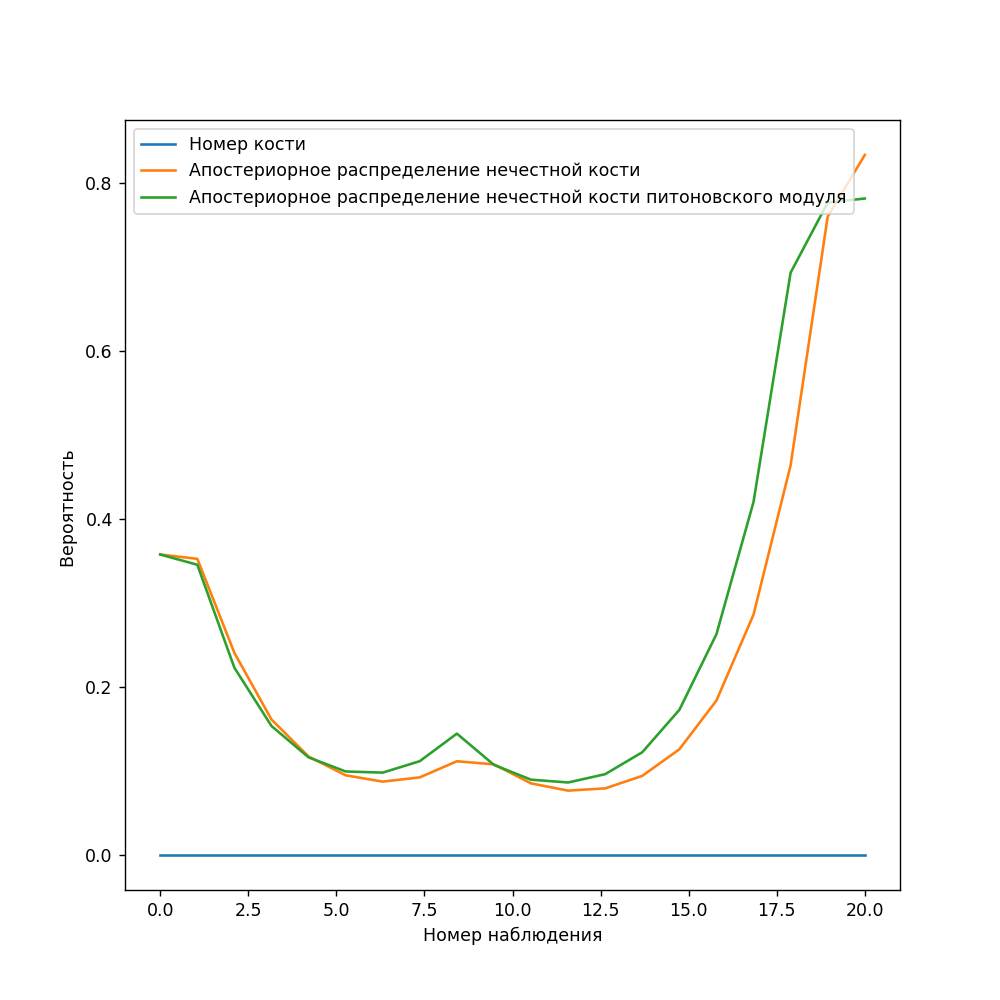

In [983]:
s = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.set_ylabel('Вероятность ')
ax.set_xlabel('Номер наблюдения')
ax.plot(s, X[1], label = 'Номер кости')
#ax.scatter(s, X[0]/5, label = 'Кол-во очков разделённое на 5', color='r')
ax.plot(s, Pd[::, 1], label = 'Апостериорное распределение нечестной кости')
ax.plot(s, model.predict_proba(X[0])[::, 1], label = 'Апостериорное распределение нечестной кости питоновского модуля')
ax.legend()